## Update
- When recheck the missingness rate in our dataset, noticed that in the raw tsv output we have 1421 proteins that have 0 intensities in every sample, not sure why this happened but I modified the code in MOVE to remove those all NAs from the log 2 transform 

In [33]:
#import libraries
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import re

In [34]:
sns.set(#style='white', 
        #context='notebook', 
        #context = 'talk',
    rc={'figure.figsize':(8,5),
       'figure.dpi': 80
       })

In [35]:
#protein_df = pd.read_csv("tutorial_data/combined_protein.tsv",sep = '\t')
df2 = pd.read_csv("Table2_Protein_intensity.csv",index_col=0)

In [36]:
df2

,H1975_TGFb_Rep1_1,H1975_TGFb_Rep1_2,H1975_TGFb_Rep2_1,H1975_TGFb_Rep2_2,H1975_TGFb_Rep3_1,H1975_TGFb_Rep3_2,H1975_unst_Rep1_1,H1975_unst_Rep1_2,H1975_unst_Rep2_1,H1975_unst_Rep2_2,...,H838_TGFb_Rep2_1,H838_TGFb_Rep2_2,H838_TGFb_Rep3_1,H838_TGFb_Rep3_2,H838_unst_Rep1_1,H838_unst_Rep1_2,H838_unst_Rep2_1,H838_unst_Rep2_2,H838_unst_Rep3_1,H838_unst_Rep3_2
Protein ID,,,,,,,,,,,,,,,,,,,,,
A0A0B4J2D5,256097088.0,224989648.0,189897472.0,226700592.0,226299744.0,215687648.0,248587984.0,350965632.0,240261136.0,302241632.0,...,196714704.0,226611984.0,261413888.0,315382240.0,284652800.0,308756384.0,271636768.0,257072832.0,244337328.0,253685552.0
A0AVT1,535837856.0,534120032.0,530518208.0,561228610.0,569221760.0,557521860.0,429171296.0,394576448.0,431233856.0,409444384.0,...,318735072.0,334567936.0,384577824.0,366920064.0,362595808.0,342701824.0,334482784.0,371651744.0,324987232.0,385820992.0
A0JLT2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,130335528.0,0.0,0.0,0.0
A0MZ66,108947752.0,83872496.0,62338752.0,0.0,61267868.0,75080672.0,117229400.0,86081496.0,0.0,0.0,...,108469800.0,93496496.0,108276240.0,109089176.0,96638336.0,102914456.0,107284608.0,119785280.0,110790184.0,111038176.0
A1L0T0,86085584.0,99675264.0,108705584.0,54282716.0,107321440.0,111930896.0,132236680.0,136177616.0,119513480.0,124447664.0,...,40196724.0,59319316.0,69017520.0,37497900.0,94634672.0,92496984.0,79763808.0,56490484.0,91828896.0,90383088.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
O15431,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Q8NHG8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Q9NRG4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
#read into the raw dataset
df_raw = pd.read_csv("D2_median.csv",index_col=0)

In [49]:
5835-4414

1421

In [50]:
df_raw.shape

(4414, 24)

In [51]:
df_raw.isna().sum()

H1975_TGFb_Rep1_1    1338
H1975_TGFb_Rep1_2    1326
H1975_TGFb_Rep2_1    1368
H1975_TGFb_Rep2_2    1284
H1975_TGFb_Rep3_1    1278
H1975_TGFb_Rep3_2    1240
H1975_unst_Rep1_1    1013
H1975_unst_Rep1_2     969
H1975_unst_Rep2_1    1238
H1975_unst_Rep2_2    1259
H1975_unst_Rep3_1    1167
H1975_unst_Rep3_2    1069
H838_TGFb_Rep1_1     1215
H838_TGFb_Rep1_2     1258
H838_TGFb_Rep2_1     1161
H838_TGFb_Rep2_2     1150
H838_TGFb_Rep3_1     1086
H838_TGFb_Rep3_2     1118
H838_unst_Rep1_1     1096
H838_unst_Rep1_2     1054
H838_unst_Rep2_1     1039
H838_unst_Rep2_2     1061
H838_unst_Rep3_1     1015
H838_unst_Rep3_2      994
dtype: int64

In [52]:
df_raw[df_raw.count(axis=1) < 1]

,H1975_TGFb_Rep1_1,H1975_TGFb_Rep1_2,H1975_TGFb_Rep2_1,H1975_TGFb_Rep2_2,H1975_TGFb_Rep3_1,H1975_TGFb_Rep3_2,H1975_unst_Rep1_1,H1975_unst_Rep1_2,H1975_unst_Rep2_1,H1975_unst_Rep2_2,...,H838_TGFb_Rep2_1,H838_TGFb_Rep2_2,H838_TGFb_Rep3_1,H838_TGFb_Rep3_2,H838_unst_Rep1_1,H838_unst_Rep1_2,H838_unst_Rep2_1,H838_unst_Rep2_2,H838_unst_Rep3_1,H838_unst_Rep3_2
Protein ID,,,,,,,,,,,,,,,,,,,,,


In [53]:
cols = df_raw.columns[df_raw.columns.str.contains('H1975')]

In [54]:
df_raw = df_raw[cols]

In [55]:
df_raw.shape

(4414, 12)

In [56]:
df_raw[df_raw.count(axis=1) < 1]

,H1975_TGFb_Rep1_1,H1975_TGFb_Rep1_2,H1975_TGFb_Rep2_1,H1975_TGFb_Rep2_2,H1975_TGFb_Rep3_1,H1975_TGFb_Rep3_2,H1975_unst_Rep1_1,H1975_unst_Rep1_2,H1975_unst_Rep2_1,H1975_unst_Rep2_2,H1975_unst_Rep3_1,H1975_unst_Rep3_2
Protein ID,,,,,,,,,,,,
A3KMH1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
O00220,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
O00339,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
O00411,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
O00418,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
Q8NHU6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Q15032,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Q8IXS6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
df_raw = df_raw[df_raw.count(axis=1) > 0] #remove all NAs case in the case vs control group

In [58]:
df_raw

,H1975_TGFb_Rep1_1,H1975_TGFb_Rep1_2,H1975_TGFb_Rep2_1,H1975_TGFb_Rep2_2,H1975_TGFb_Rep3_1,H1975_TGFb_Rep3_2,H1975_unst_Rep1_1,H1975_unst_Rep1_2,H1975_unst_Rep2_1,H1975_unst_Rep2_2,H1975_unst_Rep3_1,H1975_unst_Rep3_2
Protein ID,,,,,,,,,,,,
A0A0B4J2D5,-0.151696,-0.335054,-0.626737,-0.325730,-0.340761,-0.383974,-0.127019,0.439080,-0.295171,0.026038,-0.159910,0.174890
A0AVT1,0.913410,0.912252,0.855444,0.982071,0.989995,0.986110,0.660778,0.608055,0.548696,0.464003,0.593229,0.679925
A0JLT2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.738922
A0MZ66,-1.384751,-1.758643,-2.233757,NaN,-2.225793,-1.906405,-1.211441,-1.588474,NaN,NaN,NaN,-2.181228
A1L0T0,-1.724543,-1.509605,-1.431532,-2.387953,-1.417057,-1.330310,-1.037653,-0.926760,-1.302601,-1.254125,-1.378793,-0.840897
...,...,...,...,...,...,...,...,...,...,...,...,...
Q86YN1,-2.041385,-1.719861,NaN,-1.962776,NaN,-1.530156,-0.777072,-1.027157,NaN,NaN,-1.291540,-1.489813
Q92871,-1.258929,NaN,-1.127444,-0.905158,-1.010275,NaN,-0.621691,NaN,-0.757116,-0.909780,-1.044082,-1.237078
Q9BW19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.032345,NaN,NaN,NaN,NaN


In [271]:
missing = df_raw.isna().sum(axis=0)
missing.name = 'Missing'
df1 = pd.DataFrame(missing)
df1['Missing (%)'] = round(df1['Missing'] / len(df_raw) * 100,1)

In [272]:
df1

,Missing,Missing (%)
H1975_TGFb_Rep1_1,914,22.9
H1975_TGFb_Rep1_2,902,22.6
H1975_TGFb_Rep2_1,944,23.7
H1975_TGFb_Rep2_2,860,21.6
H1975_TGFb_Rep3_1,854,21.4
H1975_TGFb_Rep3_2,816,20.5
H1975_unst_Rep1_1,589,14.8
H1975_unst_Rep1_2,545,13.7
H1975_unst_Rep2_1,814,20.4
H1975_unst_Rep2_2,835,20.9


In [273]:
columns=[('All proteins','Missing'),('All proteins','Missing (%)')]
df1.columns=pd.MultiIndex.from_tuples(columns)

In [274]:
df1

All proteins            
                       Missing Missing (%)
H1975_TGFb_Rep1_1          914        22.9
H1975_TGFb_Rep1_2          902        22.6
H1975_TGFb_Rep2_1          944        23.7
H1975_TGFb_Rep2_2          860        21.6
H1975_TGFb_Rep3_1          854        21.4
H1975_TGFb_Rep3_2          816        20.5
H1975_unst_Rep1_1          589        14.8
H1975_unst_Rep1_2          545        13.7
H1975_unst_Rep2_1          814        20.4
H1975_unst_Rep2_2          835        20.9
H1975_unst_Rep3_1          743        18.6
H1975_unst_Rep3_2          645        16.2

In [275]:
## the common protein dataset
df_com = pd.read_csv("D3_common_proteins.csv",index_col=0)

In [276]:
df_com.shape

(3846, 24)

In [277]:
df_com[df_com.count(axis=1) < 1]

,H1975_TGFb_Rep1_1,H1975_TGFb_Rep1_2,H1975_TGFb_Rep2_1,H1975_TGFb_Rep2_2,H1975_TGFb_Rep3_1,H1975_TGFb_Rep3_2,H1975_unst_Rep1_1,H1975_unst_Rep1_2,H1975_unst_Rep2_1,H1975_unst_Rep2_2,...,H838_TGFb_Rep2_1,H838_TGFb_Rep2_2,H838_TGFb_Rep3_1,H838_TGFb_Rep3_2,H838_unst_Rep1_1,H838_unst_Rep1_2,H838_unst_Rep2_1,H838_unst_Rep2_2,H838_unst_Rep3_1,H838_unst_Rep3_2
Protein ID,,,,,,,,,,,,,,,,,,,,,


In [278]:
df_com = df_com[cols]

In [279]:
df_com[df_com.count(axis=1) < 1]

,H1975_TGFb_Rep1_1,H1975_TGFb_Rep1_2,H1975_TGFb_Rep2_1,H1975_TGFb_Rep2_2,H1975_TGFb_Rep3_1,H1975_TGFb_Rep3_2,H1975_unst_Rep1_1,H1975_unst_Rep1_2,H1975_unst_Rep2_1,H1975_unst_Rep2_2,H1975_unst_Rep3_1,H1975_unst_Rep3_2
Protein ID,,,,,,,,,,,,
O00418,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
O00458,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
O00468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
O00746,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
O14639,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
Q5ST30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
P56381,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Q8IXS6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [280]:
df_com = df_com[df_com.count(axis=1) > 0] #remove all NAs case in the case vs control group

In [281]:
df_com.shape

(3604, 12)

In [283]:
#plt.hist(df_com['H1975_TGFb_Rep1_1'],alpha=0.5)

In [284]:
#plt.hist(df_raw['H1975_TGFb_Rep1_1'])

In [298]:
missing = df_com.isna().sum(axis=0)
missing.name = 'Missing'
df2 = pd.DataFrame(missing)
df2['Missing (%)'] = round(df2['Missing'] / len(df_com) * 100,1)

In [299]:
df2

,Missing,Missing (%)
H1975_TGFb_Rep1_1,580,16.1
H1975_TGFb_Rep1_2,560,15.5
H1975_TGFb_Rep2_1,630,17.5
H1975_TGFb_Rep2_2,553,15.3
H1975_TGFb_Rep3_1,524,14.5
H1975_TGFb_Rep3_2,501,13.9
H1975_unst_Rep1_1,363,10.1
H1975_unst_Rep1_2,335,9.3
H1975_unst_Rep2_1,501,13.9
H1975_unst_Rep2_2,517,14.3


In [300]:
columns=[('Common proteins','Missing'),('Common proteins','Missing (%)')]
df2.columns=pd.MultiIndex.from_tuples(columns)

In [301]:
df2

Common proteins            
                          Missing Missing (%)
H1975_TGFb_Rep1_1             580        16.1
H1975_TGFb_Rep1_2             560        15.5
H1975_TGFb_Rep2_1             630        17.5
H1975_TGFb_Rep2_2             553        15.3
H1975_TGFb_Rep3_1             524        14.5
H1975_TGFb_Rep3_2             501        13.9
H1975_unst_Rep1_1             363        10.1
H1975_unst_Rep1_2             335         9.3
H1975_unst_Rep2_1             501        13.9
H1975_unst_Rep2_2             517        14.3
H1975_unst_Rep3_1             438        12.2
H1975_unst_Rep3_2             369        10.2

In [302]:
pd.concat([df1,df2],axis=1)

All proteins             Common proteins            
                       Missing Missing (%)         Missing Missing (%)
H1975_TGFb_Rep1_1          914        22.9             580        16.1
H1975_TGFb_Rep1_2          902        22.6             560        15.5
H1975_TGFb_Rep2_1          944        23.7             630        17.5
H1975_TGFb_Rep2_2          860        21.6             553        15.3
H1975_TGFb_Rep3_1          854        21.4             524        14.5
H1975_TGFb_Rep3_2          816        20.5             501        13.9
H1975_unst_Rep1_1          589        14.8             363        10.1
H1975_unst_Rep1_2          545        13.7             335         9.3
H1975_unst_Rep2_1          814        20.4             501        13.9
H1975_unst_Rep2_2          835        20.9             517        14.3
H1975_unst_Rep3_1          743        18.6             438        12.2
H1975_unst_Rep3_2          645        16.2             369        10.2

In [303]:
df1.merge(df2,left_index=True,right_index=True)

All proteins             Common proteins            
                       Missing Missing (%)         Missing Missing (%)
H1975_TGFb_Rep1_1          914        22.9             580        16.1
H1975_TGFb_Rep1_2          902        22.6             560        15.5
H1975_TGFb_Rep2_1          944        23.7             630        17.5
H1975_TGFb_Rep2_2          860        21.6             553        15.3
H1975_TGFb_Rep3_1          854        21.4             524        14.5
H1975_TGFb_Rep3_2          816        20.5             501        13.9
H1975_unst_Rep1_1          589        14.8             363        10.1
H1975_unst_Rep1_2          545        13.7             335         9.3
H1975_unst_Rep2_1          814        20.4             501        13.9
H1975_unst_Rep2_2          835        20.9             517        14.3
H1975_unst_Rep3_1          743        18.6             438        12.2
H1975_unst_Rep3_2          645        16.2             369        10.2

In [304]:
df_com.shape

(3604, 12)

In [234]:
df_raw.shape

(3990, 12)

In [235]:
df_raw.values.reshape(-1)

array([-0.1516961 , -0.33505358, -0.62673714, ...,         nan,
        0.32538791,         nan])

(array([  10.,   96.,  404., 1317., 3493., 5627., 5774., 4700., 4252.,
        3479., 2511., 1905., 1428.,  717.,  424.,  346.,  394.,  333.,
          90.,   77.]),
 array([-4.68028749, -4.04055281, -3.40081813, -2.76108345, -2.12134877,
        -1.48161409, -0.84187941, -0.20214473,  0.43758995,  1.07732463,
         1.71705931,  2.35679399,  2.99652867,  3.63626335,  4.27599803,
         4.91573271,  5.55546739,  6.19520207,  6.83493675,  7.47467143,
         8.11440611]),
 <BarContainer object of 20 artists>)

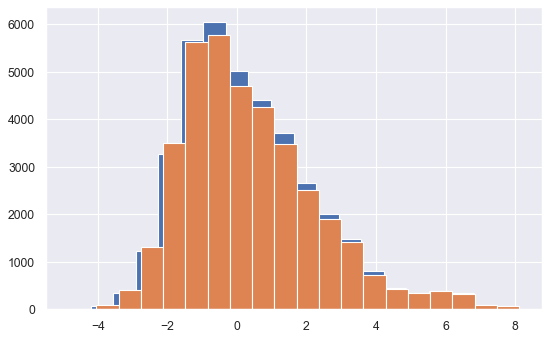

In [236]:
plt.hist(df_raw.values.reshape(-1),bins=20)
plt.hist(df_com.values.reshape(-1),bins=20)

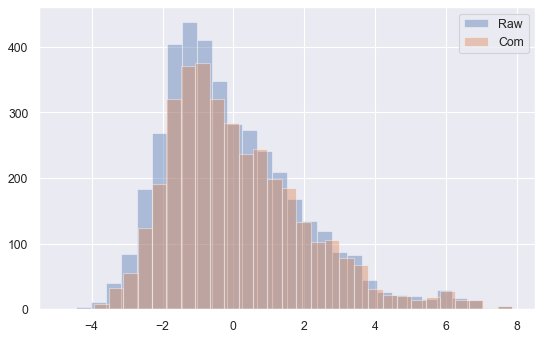

In [238]:
df_raw.mean(axis=1).hist(alpha=0.4,bins=30,label='Raw')
df_com.mean(axis=1).hist(alpha=0.4,bins=30,label='Com')
plt.legend()

In [239]:
df_raw.mean(axis=1)

Protein ID
A0A0B4J2D5   -0.175504
A0AVT1        0.766164
A0JLT2       -1.738922
A0MZ66       -1.811311
A1L0T0       -1.378486
                ...   
Q86YN1       -1.479970
Q92871       -0.985728
Q9BW19        2.032345
Q9NVP2       -1.581126
P31327        0.124929
Length: 3990, dtype: float64

In [240]:
df3 = pd.DataFrame(df_raw.mean(axis=1))

In [166]:
#np.vstack([df_raw.mean(axis=1).values, np.zeros(df_raw.shape[0], )]).shape

In [241]:
df3.rename(columns={0:'mean'},inplace=True)

In [242]:
df3

,mean
Protein ID,
A0A0B4J2D5,-0.175504
A0AVT1,0.766164
A0JLT2,-1.738922
A0MZ66,-1.811311
A1L0T0,-1.378486
...,...
Q86YN1,-1.479970
Q92871,-0.985728
Q9BW19,2.032345


In [243]:
df4 = pd.DataFrame(df_com.mean(axis=1))

In [244]:
df4.rename(columns={0:'mean'},inplace=True)

In [245]:
df3['label'] = 'raw'
df4['label'] = 'com'

In [246]:
df_m = pd.concat([df3,df4],ignore_index=True)

<AxesSubplot:xlabel='mean', ylabel='Count'>

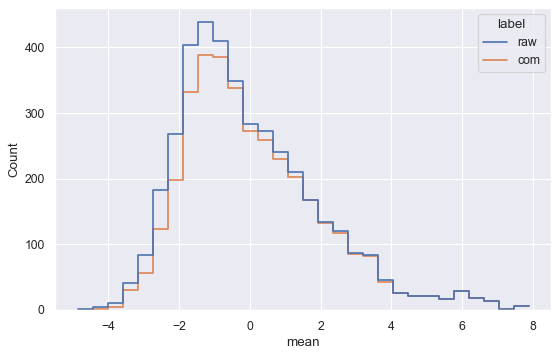

In [247]:
sns.histplot(data=df_m, x = 'mean', hue='label',bins=30,element="step", fill=False)

<AxesSubplot:xlabel='label', ylabel='mean'>

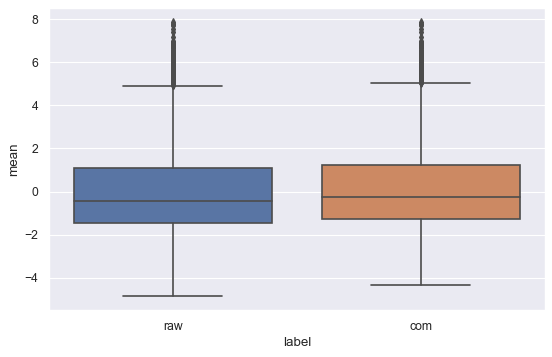

In [248]:
sns.boxplot(data=df_m, y = 'mean', x='label')

In [249]:
##cluseter map

In [253]:
df_bw = df_raw.applymap(lambda x: 1 if pd.notna(x) else 0)

In [254]:
df_bw

,H1975_TGFb_Rep1_1,H1975_TGFb_Rep1_2,H1975_TGFb_Rep2_1,H1975_TGFb_Rep2_2,H1975_TGFb_Rep3_1,H1975_TGFb_Rep3_2,H1975_unst_Rep1_1,H1975_unst_Rep1_2,H1975_unst_Rep2_1,H1975_unst_Rep2_2,H1975_unst_Rep3_1,H1975_unst_Rep3_2
Protein ID,,,,,,,,,,,,
A0A0B4J2D5,1,1,1,1,1,1,1,1,1,1,1,1
A0AVT1,1,1,1,1,1,1,1,1,1,1,1,1
A0JLT2,0,0,0,0,0,0,0,0,0,0,0,1
A0MZ66,1,1,1,0,1,1,1,1,0,0,0,1
A1L0T0,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
Q86YN1,1,1,0,1,0,1,1,1,0,0,1,1
Q92871,1,0,1,1,1,0,1,0,1,1,1,1
Q9BW19,0,0,0,0,0,0,0,1,0,0,0,0


<Figure size 640x640 with 0 Axes>

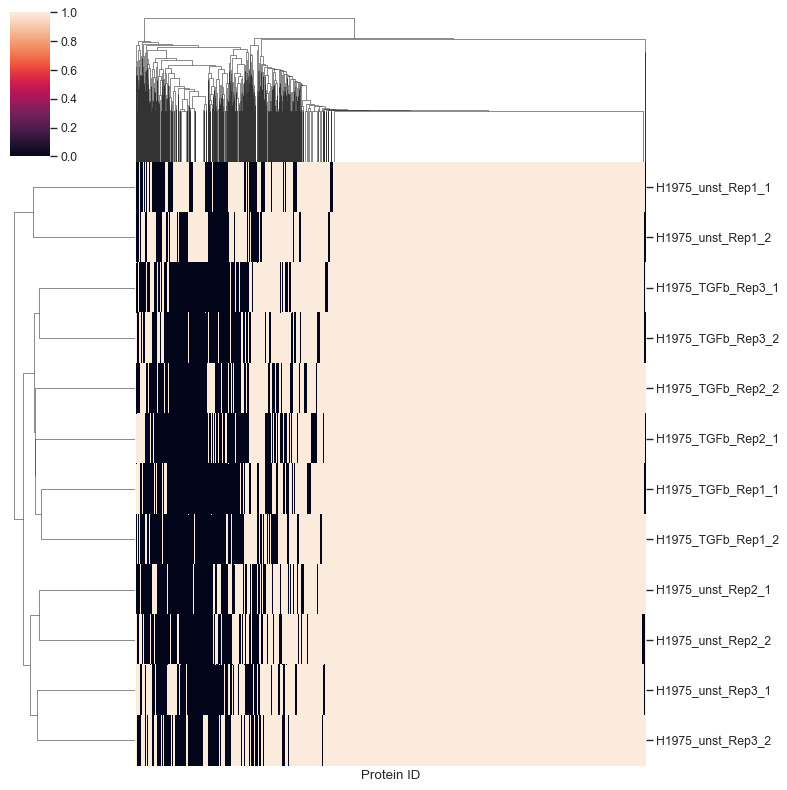

In [257]:
plt.figure(figsize=(8,8))
g=sns.clustermap(df_bw.T,
                 #row_cluster=False,
                 #col_cluster=False,
                 xticklabels=False, 
                 #yticklabels=False,
                 #row_colors=['lightgreen']*7+['deepskyblue']*8+['coral']*9,
                 #col_colors=['lightgreen']*7+['deepskyblue']*8+['coral']*9,
                 #cmap=cmap
                )